In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data Extraction

In [132]:
from pathlib import Path
import pandas as pd

all_dfs = []
for size in ['small', 'nano', 'medium']:
    size_path = Path(size)
    for model_dir in size_path.iterdir():
        csv_path = model_dir / 'results.csv'
        if csv_path.is_file():
            df = pd.read_csv(csv_path)
            df['size'] = size
            df['model'] = model_dir.name.replace('.pt_finetune_15', '').replace('small_', '').replace('medium_', '').replace('nano_', '').replace('yolo', 'YOLO').replace('YOLO1', 'YOLOv1')
            all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df['size'] = combined_df['size'].replace({'small': 'Small', 'medium': 'Medium', 'nano': 'Nano'})
# Create a column for the model version given by "model" column taking all the nubers after the written "YOLOv"
combined_df['model_version'] = combined_df['model'].str.extract(r'YOLOv(\d+)')[0]
combined_df['model_version'] = combined_df['model_version'].astype(int)
combined_df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,size,model,model_version
0,1,2078.73,0.97662,0.82237,1.16241,0.77276,0.63834,0.73087,0.48858,1.10352,0.87243,1.24165,0.004999,0.004999,0.004999,Small,YOLOv9s,9
1,2,4097.85,1.17336,1.02948,1.29376,0.72794,0.56815,0.64835,0.40151,1.27960,1.08798,1.40097,0.009890,0.009890,0.009890,Small,YOLOv9s,9
2,3,6110.18,1.23453,1.11410,1.35616,0.76320,0.62457,0.71251,0.47002,1.14290,0.91153,1.29214,0.009572,0.009572,0.009572,Small,YOLOv9s,9
3,4,8122.36,1.16325,1.01263,1.30905,0.78274,0.63787,0.73226,0.49465,1.08252,0.85023,1.24928,0.009055,0.009055,0.009055,Small,YOLOv9s,9
4,5,10135.90,1.12164,0.95671,1.28110,0.80037,0.65129,0.75478,0.51869,1.04183,0.79502,1.22462,0.008362,0.008362,0.008362,Small,YOLOv9s,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,11,46486.10,2.08713,1.64311,2.28731,0.82242,0.68507,0.79602,0.57447,2.00951,1.52273,2.21952,0.002575,0.002575,0.002575,Medium,YOLOv10m,10
251,12,50699.30,2.03348,1.57214,2.25003,0.82889,0.68507,0.79865,0.57840,1.99950,1.50519,2.21004,0.001738,0.001738,0.001738,Medium,YOLOv10m,10
252,13,54909.10,1.99078,1.51098,2.21978,0.82442,0.69361,0.80073,0.57935,1.99193,1.49813,2.20277,0.001045,0.001045,0.001045,Medium,YOLOv10m,10
253,14,59124.10,1.95066,1.46387,2.19841,0.82807,0.69180,0.80201,0.58136,1.98532,1.49264,2.19756,0.000528,0.000528,0.000528,Medium,YOLOv10m,10


In [133]:
# I want to obtain the agglomerated time of training trhough the epochs for each model and size
agg_df = combined_df.groupby(['model', 'size','model_version']).agg({'time': 'last'}).reset_index()
agg_df['time'] = agg_df['time'] / 3600  # Convert seconds to hours
agg_df['time'] = agg_df['time'].round(2)
# Sort the DataFrame by size (but not alphabetically, the order should be: Nano, Medium, Small)
agg_df['size'] = pd.Categorical(agg_df['size'], categories=['Nano', 'Small', 'Medium'], ordered=True)
agg_df = agg_df.sort_values(by=['size', 'model_version'], ascending=[True, True])
print(f"The total time of training for each model and size is: {agg_df['time'].sum() / 24} days")

# Rename the columns for better readability
agg_df.rename(columns={'model': 'Model', 'size': 'Size', 'model_version': 'Version', 'time': 'Training Time (hours)'}, inplace=True)

# Export as a LaTeX table
latex_table = agg_df.to_latex(index=False, float_format="%.2f", column_format='lccc', escape=False)
with open('latex_table.txt', 'w') as f:
    f.write(latex_table)

The total time of training for each model and size is: 5.410833333333333 days


       Model    Size  Version  mAP50-95   mAP50  Precision  Recall
0    YOLOv3n    Nano        3    0.4362  0.6836     0.7754  0.5966
1    YOLOv5n    Nano        5    0.5072  0.7465     0.7965  0.6451
2    YOLOv8n    Nano        8    0.5270  0.7607     0.8112  0.6549
3    YOLOv9n    Nano        9    0.5331  0.7664     0.8145  0.6647
4   YOLOv10n    Nano       10    0.5172  0.7478     0.7992  0.6373
5   YOLOv11n    Nano       11    0.5254  0.7614     0.8102  0.6544
6   YOLOv12n    Nano       12    0.5325  0.7674     0.8042  0.6666
7    YOLOv5s   Small        5    0.5581  0.7896     0.8174  0.6874
8    YOLOv8s   Small        8    0.5737  0.8029     0.8248  0.7021
9    YOLOv9s   Small        9    0.5778  0.8035     0.8301  0.7024
10  YOLOv10s   Small       10    0.5598  0.7850     0.8110  0.6738
11  YOLOv11s   Small       11    0.5715  0.7996     0.8262  0.6905
12  YOLOv12s   Small       12    0.5677  0.7967     0.8192  0.6908
13   YOLOv5m  Medium        5    0.5860  0.8082     0.8136  0.

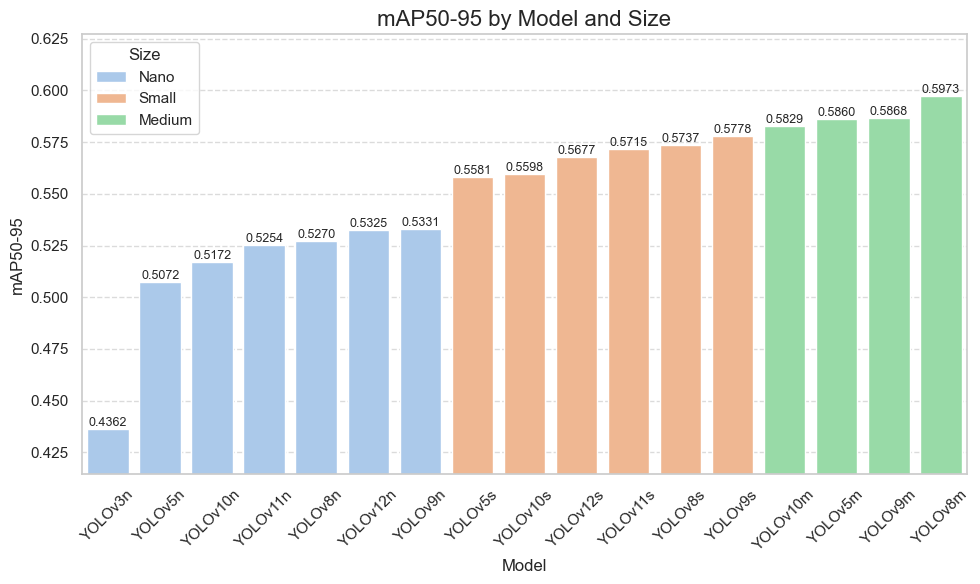

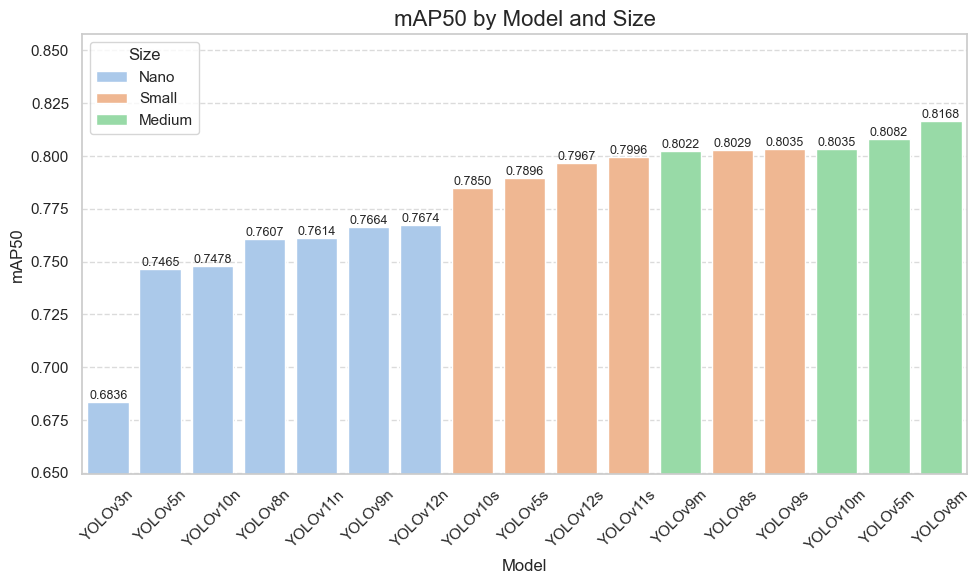

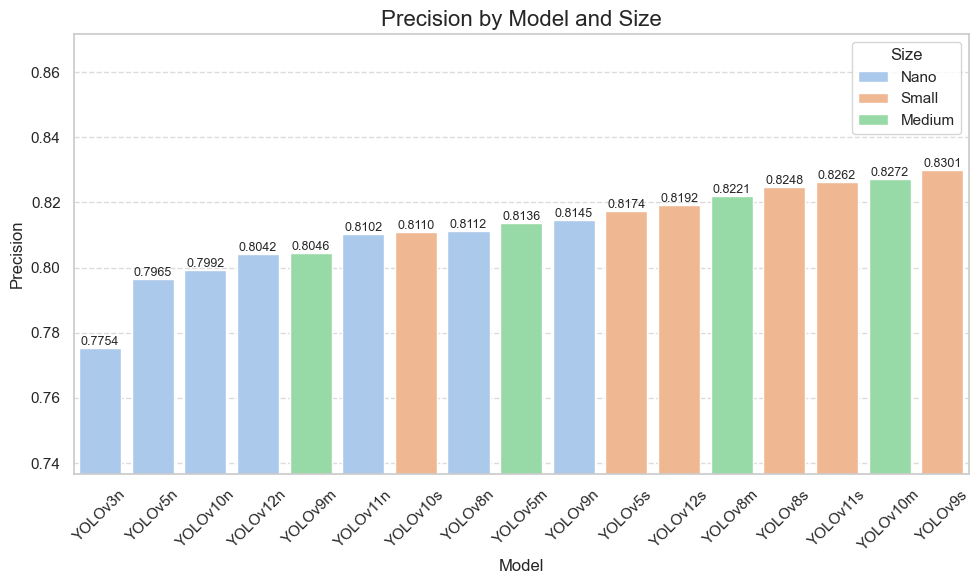

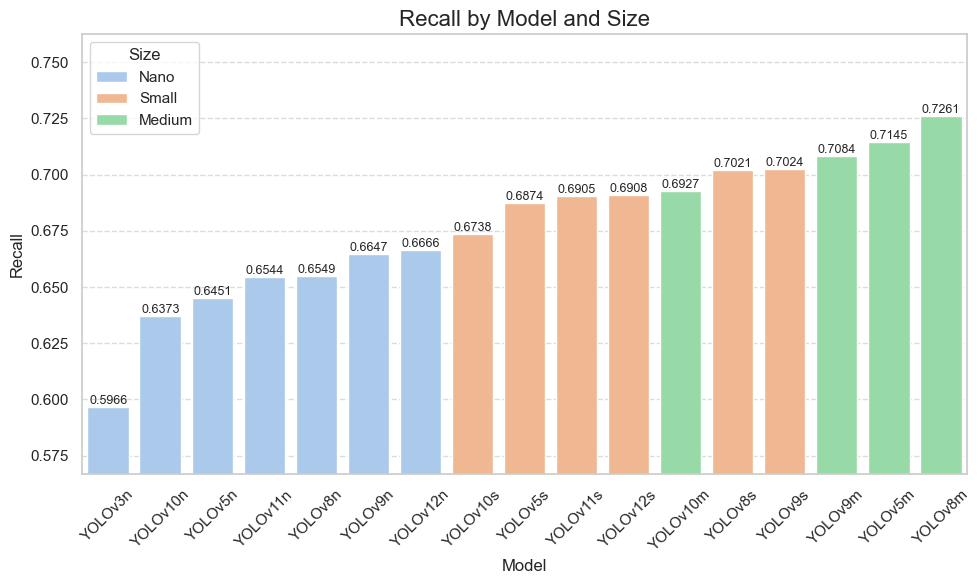

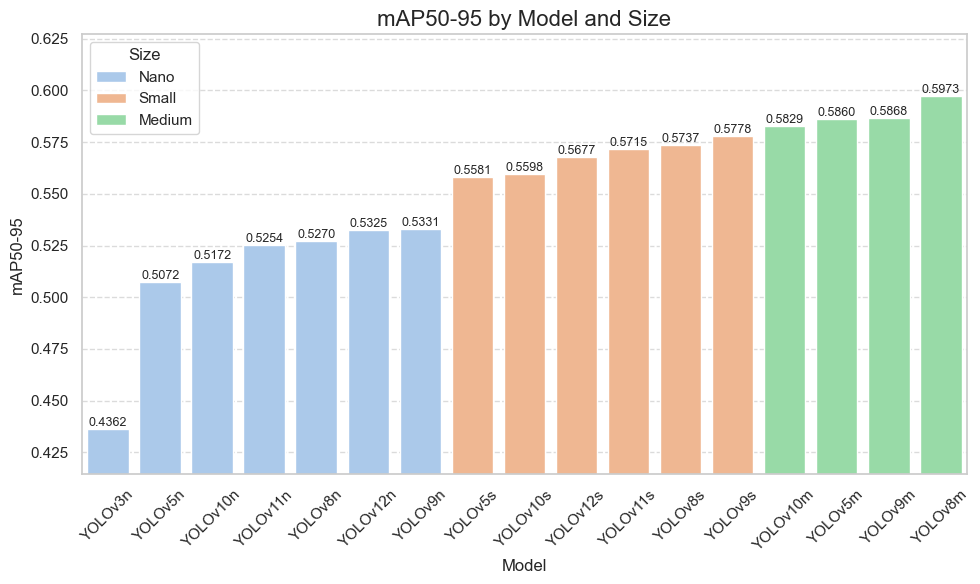

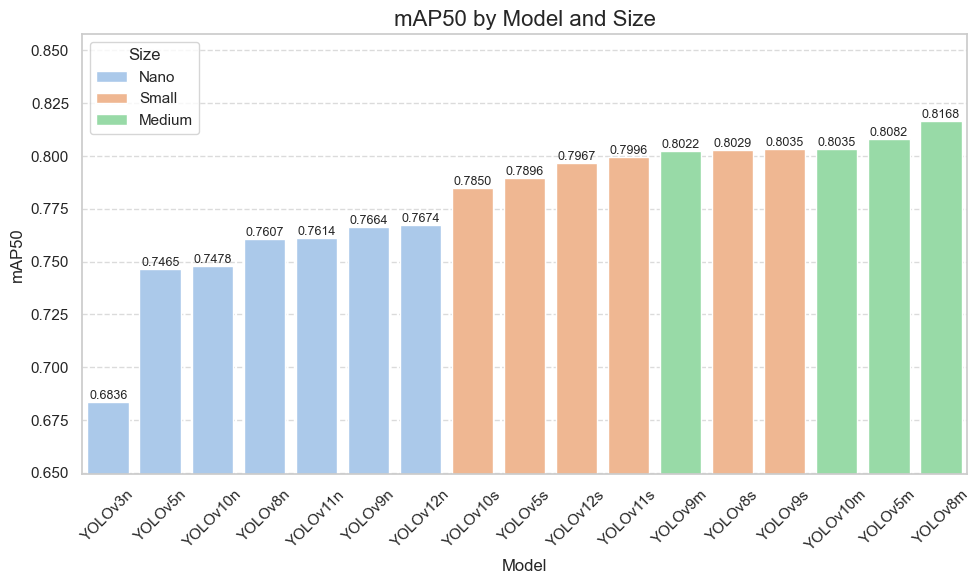

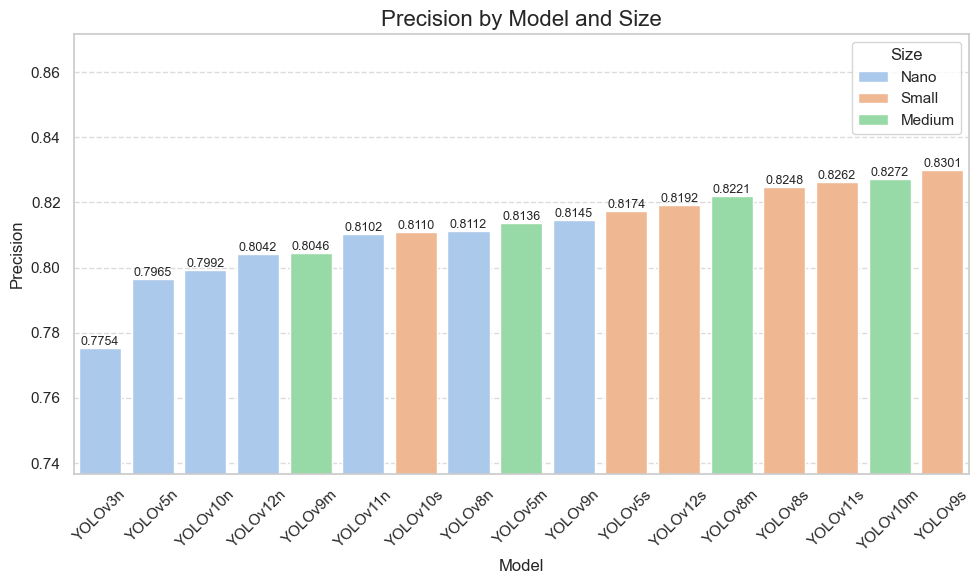

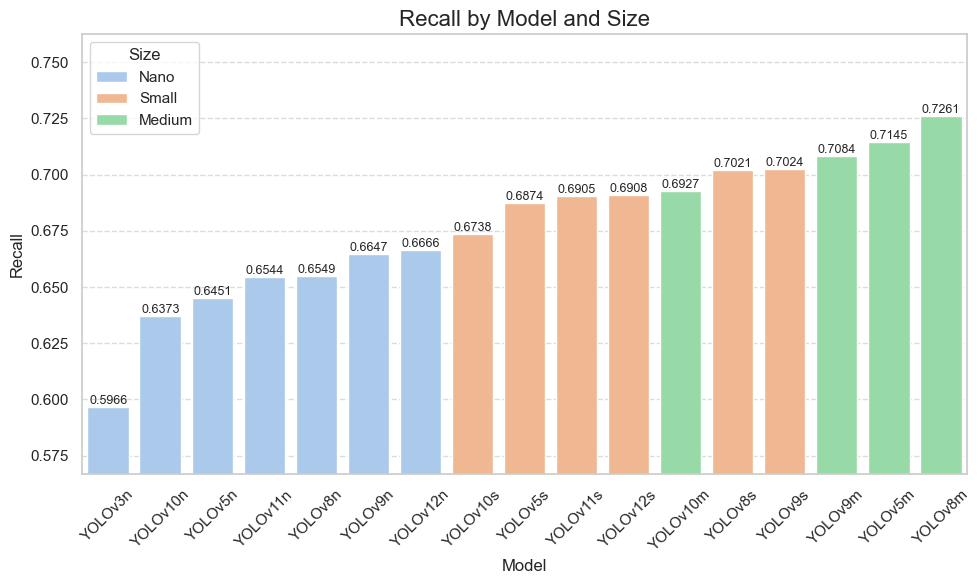

In [134]:
# 1) build summary
last_df = combined_df.groupby(['model','size','model_version']).agg({
    'metrics/mAP50-95(B)': 'last',
    'metrics/mAP50(B)': 'last',
    'metrics/precision(B)': 'last',
    'metrics/recall(B)': 'last',
}).reset_index()

# 2) build summary
last_df['metrics/mAP50-95(B)'] = last_df['metrics/mAP50-95(B)'].round(4)
last_df['metrics/mAP50(B)'] = last_df['metrics/mAP50(B)'].round(4)
last_df['metrics/precision(B)'] = last_df['metrics/precision(B)'].round(4)
last_df['metrics/recall(B)'] = last_df['metrics/recall(B)'].round(4)
last_df = last_df.rename(columns={
    'metrics/mAP50-95(B)': 'mAP50-95',
    'metrics/mAP50(B)': 'mAP50',
    'metrics/precision(B)': 'Precision',
    'metrics/recall(B)': 'Recall'
})
last_df = last_df.rename(columns={'model': 'Model', 'model_version': 'Version', 'size': 'Size'})

# Reorder columns
last_df = last_df[['Model', 'Size', 'Version', 'mAP50-95', 'mAP50', 'Precision', 'Recall']]
# Sort by Size and Version
last_df['Size'] = pd.Categorical(last_df['Size'], categories=['Nano', 'Small', 'Medium'], ordered=True)
last_df = last_df.sort_values(by=['Size', 'Version'], ascending=[True, True])
# Reset index
last_df = last_df.reset_index(drop=True)
# Print the summary
print(last_df)

# Plotting
def plot_metrics(df, metric, title, path=None):
    plt.figure(figsize=(10, 6))
    # Order models by metric ascending for better visualization
    order = df.sort_values(by=metric, ascending=True)['Model'].unique().tolist()
    ax = sns.barplot(data=df, x='Model', y=metric, hue='Size', order=order)
    plt.title(title, fontsize=16)
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.ylim(df[metric].min() * 0.95, df[metric].max() * 1.05)
    plt.legend(title='Size')
    plt.tight_layout()

    # Add value labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", label_type="edge", fontsize=9)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    if path:
        plt.savefig(path, bbox_inches='tight', dpi=300)
    else:
        plt.show()
    
# Plot mAP50-95
plot_metrics(last_df, 'mAP50-95', 'mAP50-95 by Model and Size')
# Plot mAP50
plot_metrics(last_df, 'mAP50', 'mAP50 by Model and Size')
# Plot Precision
plot_metrics(last_df, 'Precision', 'Precision by Model and Size')
# Plot Recall
plot_metrics(last_df, 'Recall', 'Recall by Model and Size')

# Save the plots in a new directory
output_dir = Path('plots')
output_dir.mkdir(exist_ok=True)
plot_metrics(last_df, 'mAP50-95', 'mAP50-95 by Model and Size', path=output_dir / 'mAP50-95.png')
plot_metrics(last_df, 'mAP50', 'mAP50 by Model and Size', path=output_dir / 'mAP50.png')
plot_metrics(last_df, 'Precision', 'Precision by Model and Size', path=output_dir / 'Precision.png')
plot_metrics(last_df, 'Recall', 'Recall by Model and Size', path=output_dir / 'Recall.png')

# Save as a LaTeX table
latex_table = last_df.to_latex(index=False, float_format="%.4f", column_format='lcccccc', escape=False)
with open('latex_table_summary.txt', 'w') as f:
    f.write(latex_table)

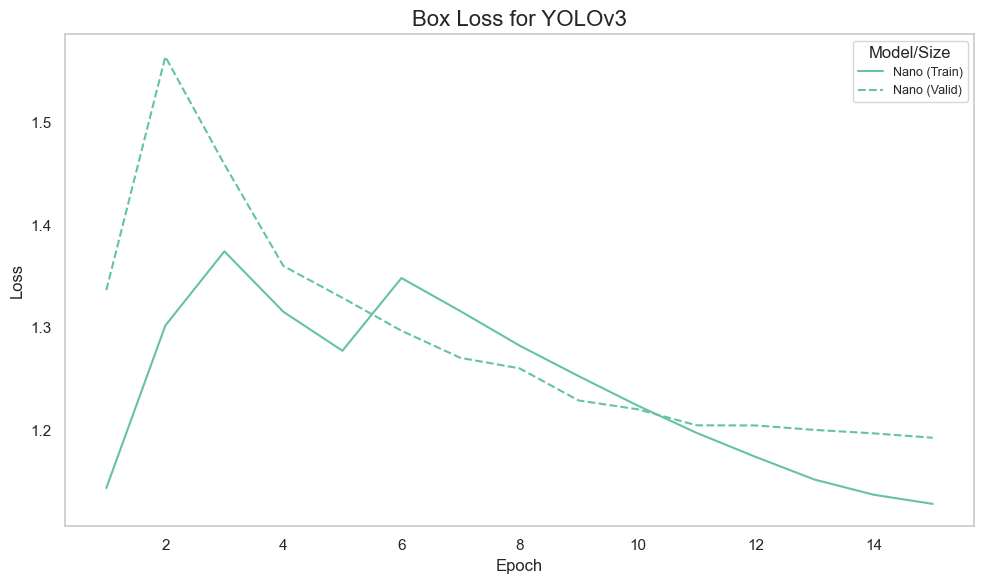

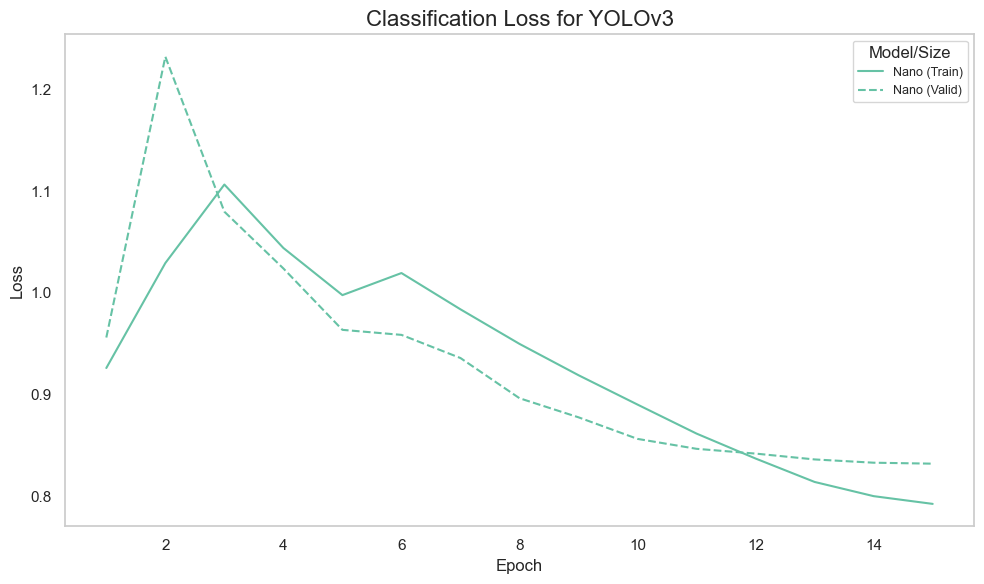

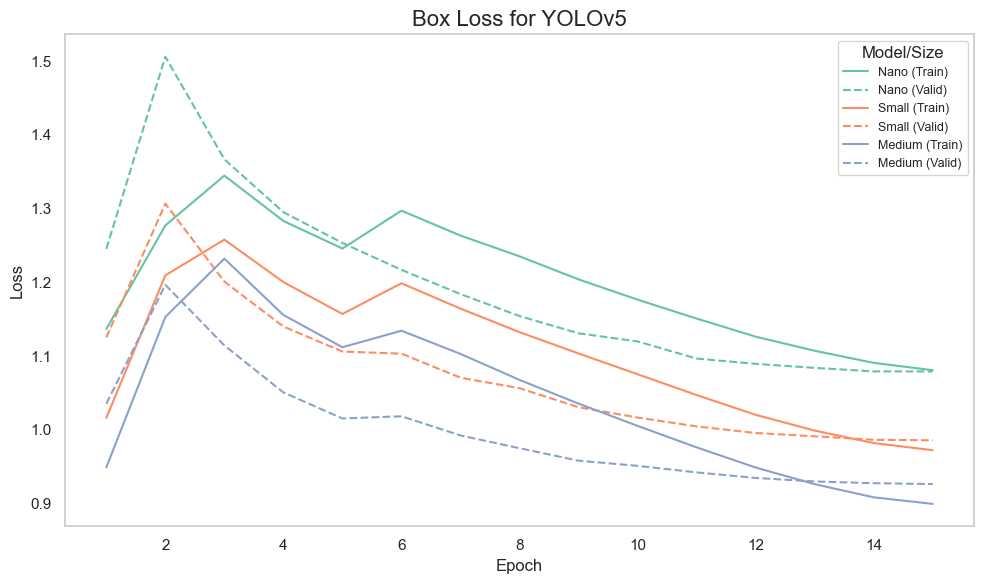

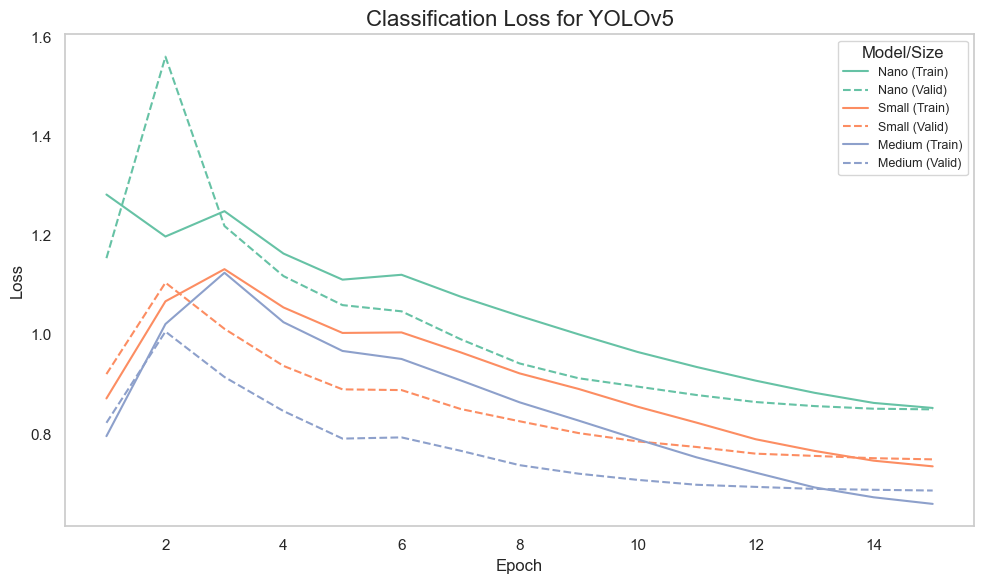

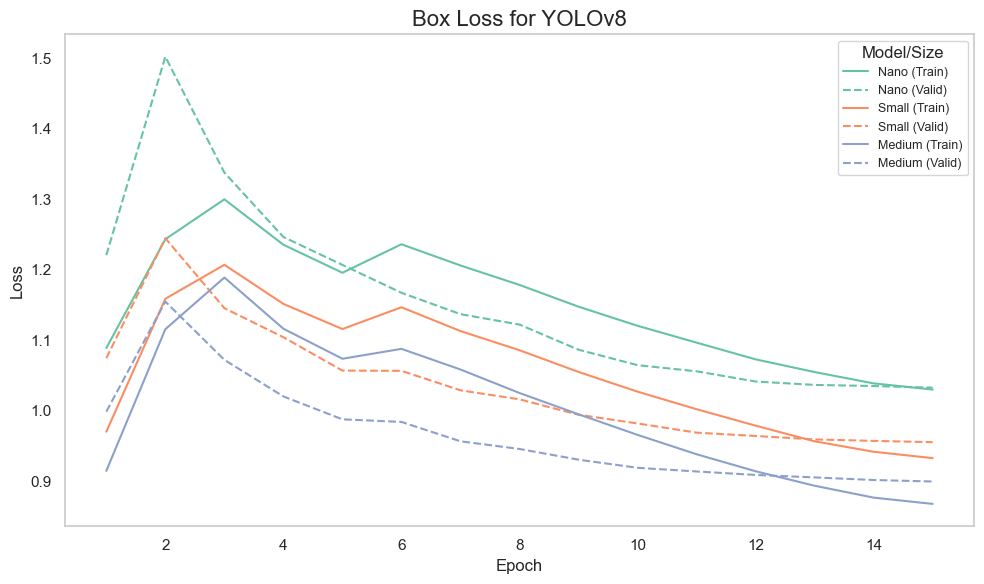

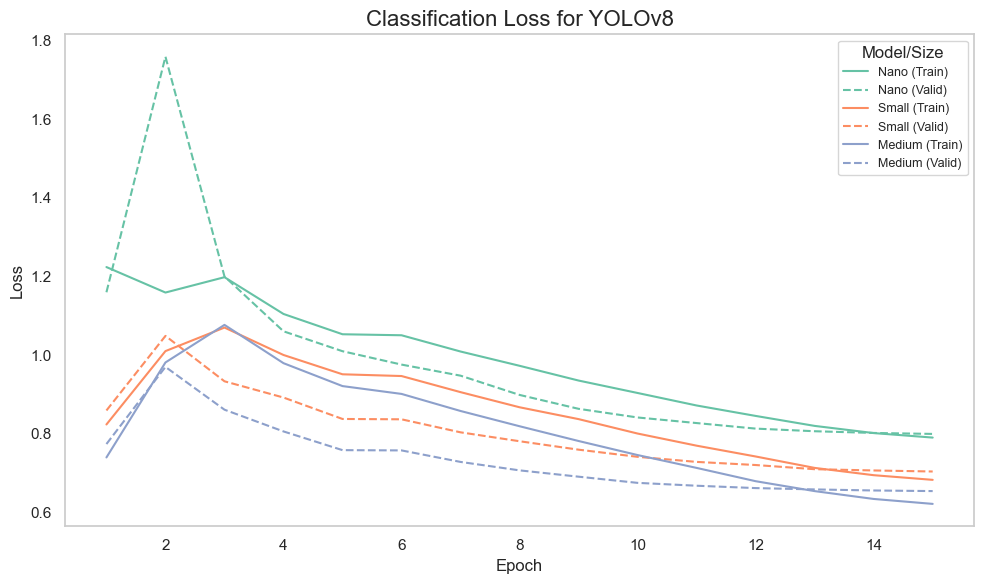

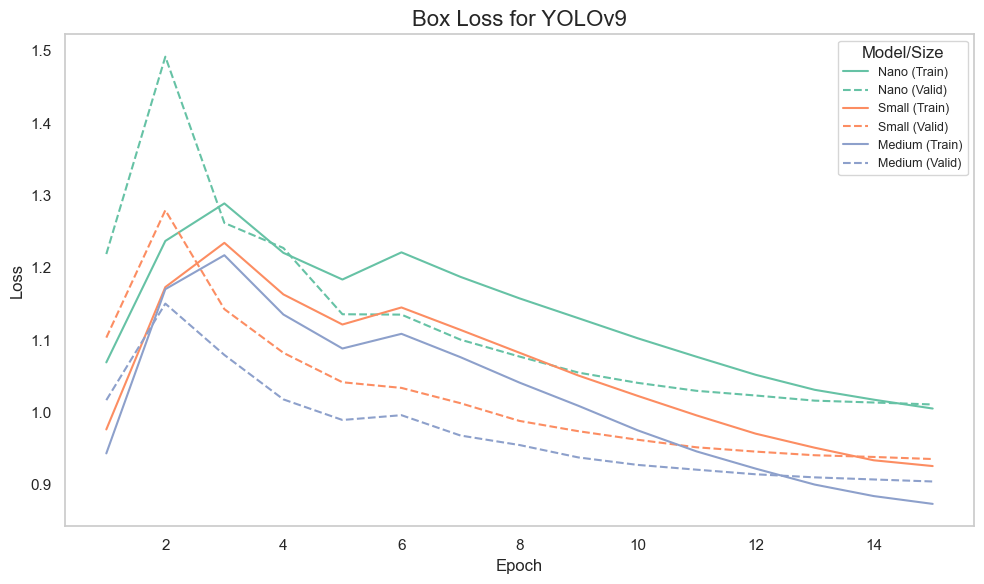

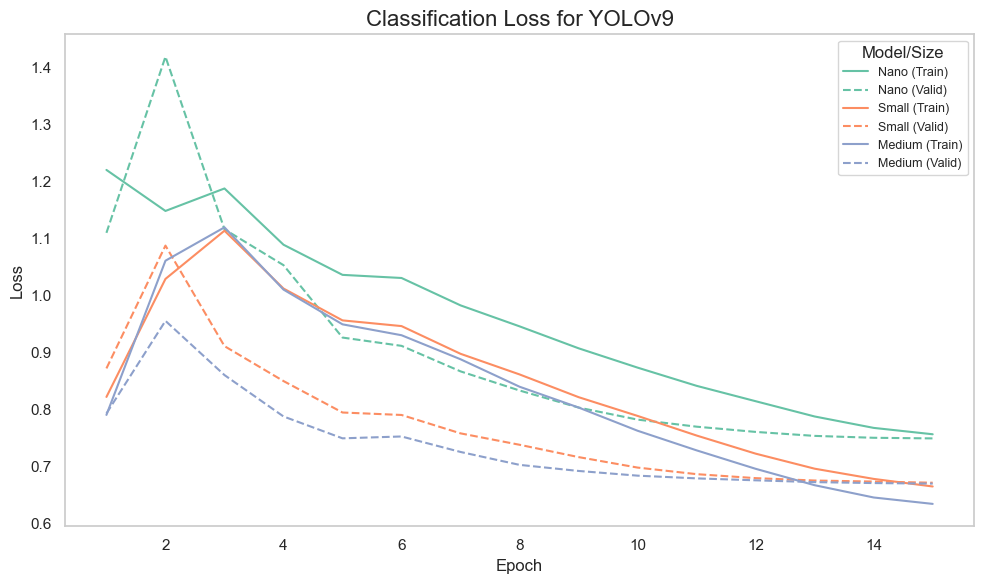

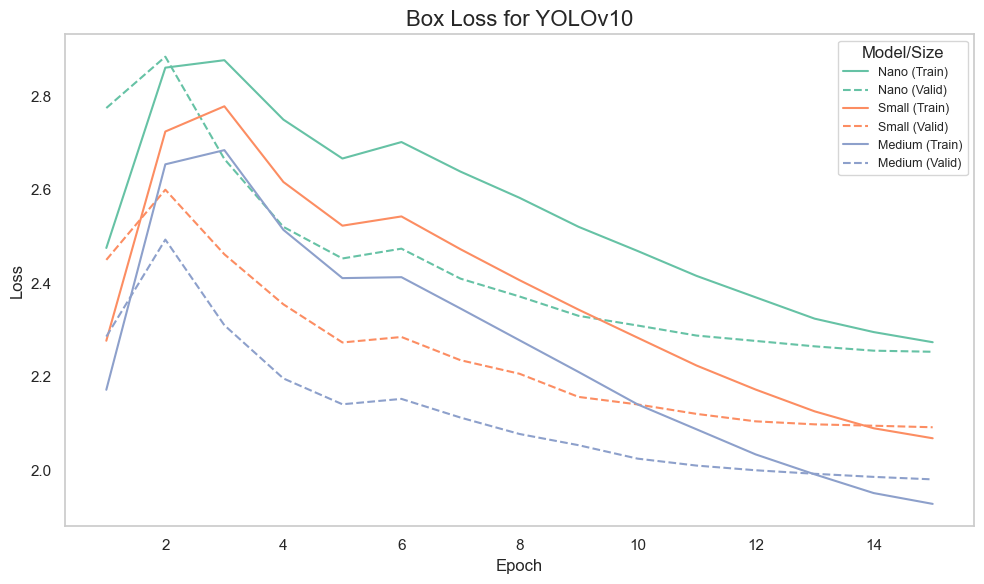

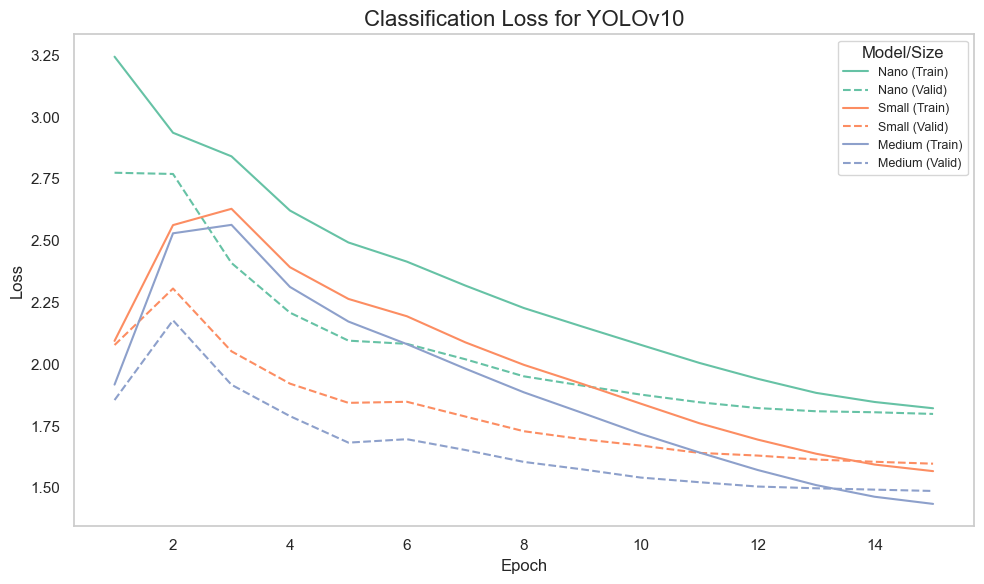

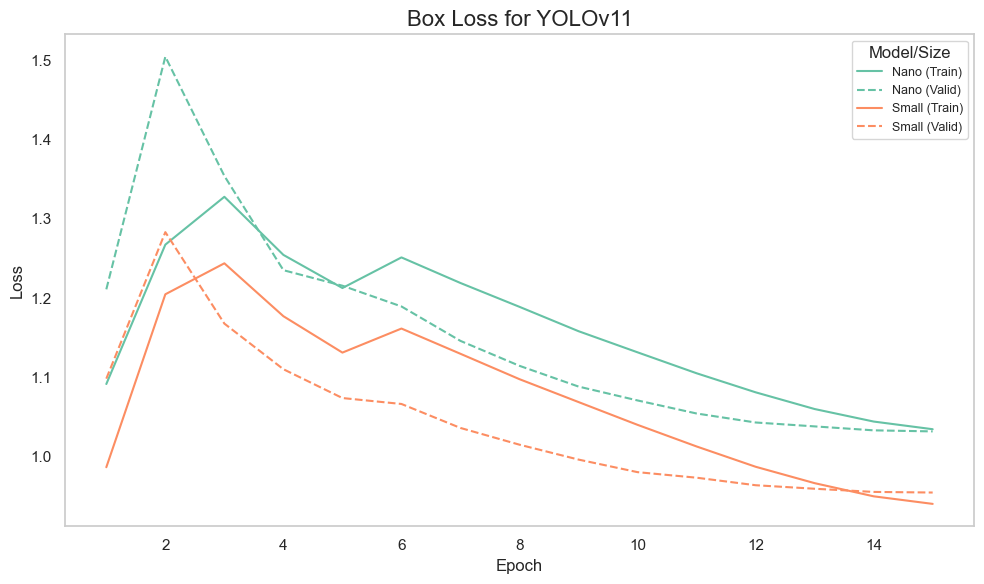

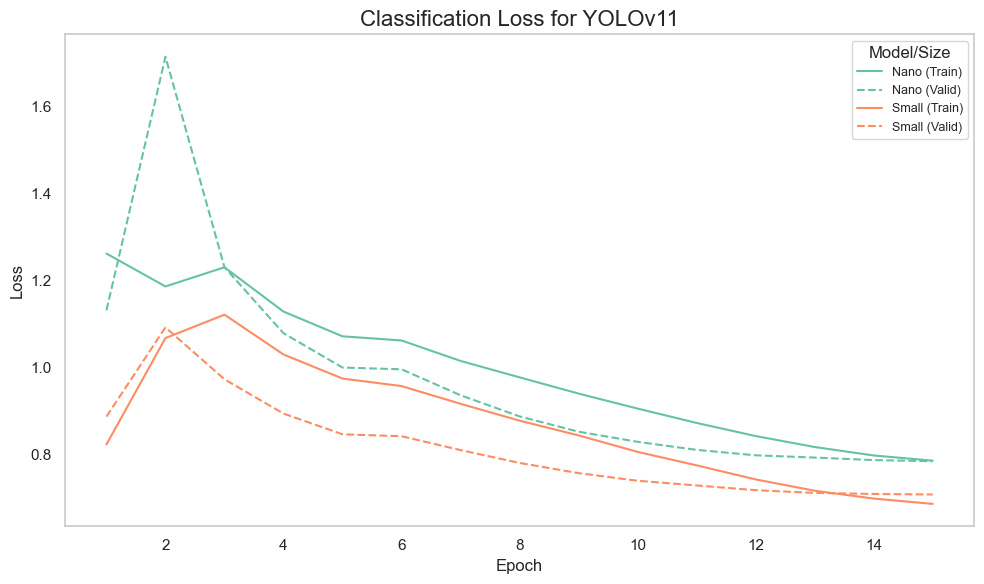

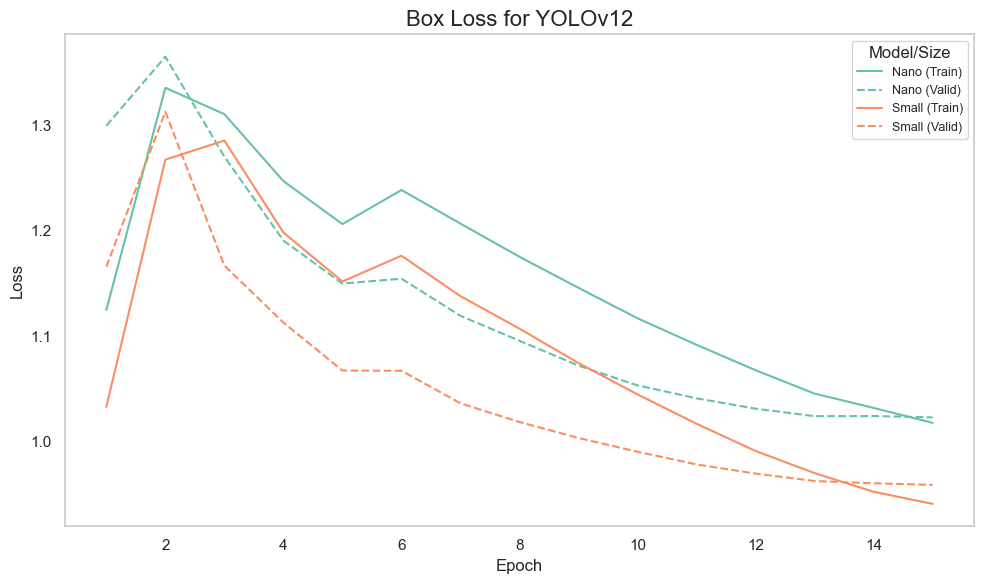

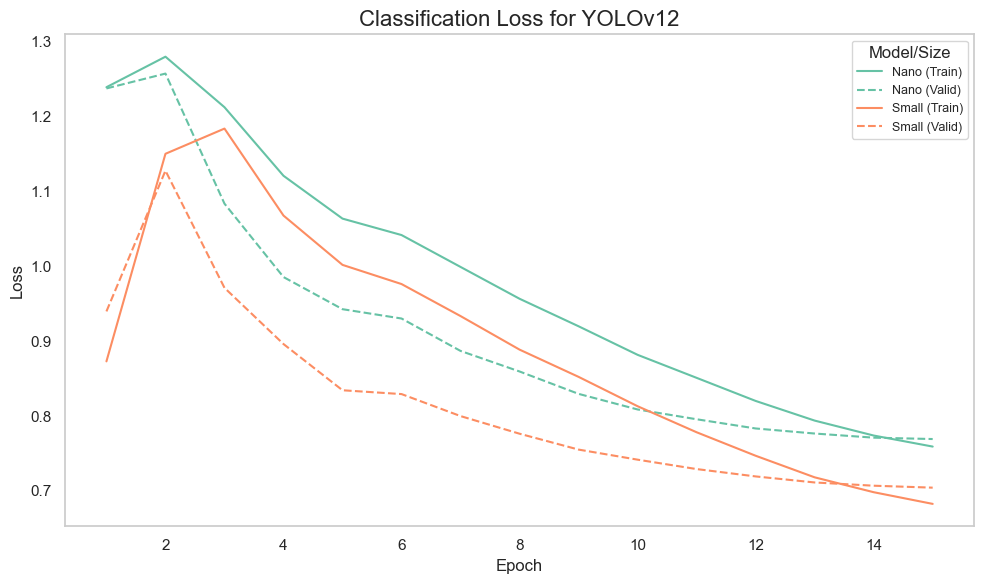

In [138]:
# For each version, plot train/box_loss and val/box_loss of all the different sizes,
# distinguishing the sizes by color and train/valid by line style

def plot_loss(df, version, loss, path=None):
    plt.figure(figsize=(10, 6))
    version_df = df[df['model_version'] == version]
    # Use the desired order for sizes
    size_order = ['Nano', 'Small', 'Medium']
    sizes = [s for s in size_order if s in version_df['size'].unique()]
    palette = sns.color_palette("Set2", len(sizes))
    size_color = dict(zip(sizes, palette))
    legend_handles = []

    for size in sizes:
        size_df = version_df[version_df['size'] == size]
        for model in size_df['model'].unique():
            model_df = size_df[size_df['model'] == model]
            # Plot train loss
            train_loss = 'train/' + loss
            line1 = sns.lineplot(
                data=model_df, x='epoch', y=train_loss,
                label=f"{size} (Train)",
                color=size_color[size], linestyle='-'
            )
            val_loss = 'val/' + loss
            # Plot val loss
            line2 = sns.lineplot(
                data=model_df, x='epoch', y=val_loss,
                label=f"{size} (Valid)",
                color=size_color[size], linestyle='--'
            )
    # Normalize loss name for title
    loss_title = loss.replace('_', ' ').replace('cls','classification').title()
    plt.title(f'{loss_title} for YOLOv{version}', fontsize=16)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    # Reorder legend
    handles, labels = plt.gca().get_legend_handles_labels()
    legend_order = []
    for size in size_order:
        legend_order.extend([f"{size} (Train)", f"{size} (Valid)"])
    ordered = [(h, l) for l, h in zip(labels, handles) if l in legend_order]
    ordered = sorted(ordered, key=lambda x: legend_order.index(x[1]))
    if ordered:
        handles, labels = zip(*ordered)
        plt.legend(handles, labels, title='Model/Size', loc='upper right', fontsize=9)
    else:
        plt.legend(title='Model/Size', loc='upper right', fontsize=9)
    plt.grid()
    plt.tight_layout()

    if path:
        plt.savefig(path, bbox_inches='tight', dpi=300)
    else:
        plt.show()

# Plot loss curves for each version
output_dir = Path('plots/loss_curves')
output_dir.mkdir(exist_ok=True)
for version in last_df['Version'].unique():
    plot_loss(combined_df, version, "box_loss", path=output_dir / f'boxloss_curves_yolov{version}.png')
    plot_loss(combined_df, version, "cls_loss", path=output_dir / f'clsloss_curves_yolov{version}.png')

In [136]:
# 1) build summary
trainlossdf = combined_df.groupby(['model','size','model_version']).agg({
    'train/box_loss': 'last',
    'train/cls_loss': 'last',
    'val/box_loss': 'last',
    'val/cls_loss': 'last',
}).reset_index()

# 2) build summary
trainlossdf['train/box_loss'] = trainlossdf['train/box_loss'].round(4)
trainlossdf['train/cls_loss'] = trainlossdf['train/cls_loss'].round(4)
trainlossdf['val/box_loss'] = trainlossdf['val/box_loss'].round(4)
trainlossdf['val/cls_loss'] = trainlossdf['val/cls_loss'].round(4)
trainlossdf = trainlossdf.rename(columns={'model': 'Model',
                                          'model_version': 'Version',
                                          'size': 'Size',
                                          'train/box_loss': 'Train Box Loss',
                                          'train/cls_loss': 'Train Classification Loss',
                                          'val/box_loss': 'Validation Box Loss',
                                          'val/cls_loss': 'Validation Classification Loss'})

# Reorder columns
trainlossdf = trainlossdf[['Model', 'Size', 'Version', 'Train Box Loss', 'Validation Box Loss', 'Train Classification Loss', 'Validation Classification Loss']]
# Sort by Size and Version
trainlossdf['Size'] = pd.Categorical(trainlossdf['Size'], categories=['Nano', 'Small', 'Medium'], ordered=True)
trainlossdf = trainlossdf.sort_values(by=['Size', 'Version'], ascending=[True, True])
# Drop the Version and Size columns
trainlossdf = trainlossdf.drop(columns=['Version', 'Size'])
# Reset index
trainlossdf = trainlossdf.reset_index(drop=True)
# Print the summary
print(trainlossdf)

# Save as a LaTeX table
latex_table = trainlossdf.to_latex(index=False, float_format="%.4f", column_format='lcccccc', escape=False)
with open('latex_table_trainloss.txt', 'w') as f:
    f.write(latex_table)

       Model  Train Box Loss  Validation Box Loss  Train Classification Loss  \
0    YOLOv3n          1.1285               1.1929                     0.7922   
1    YOLOv5n          1.0808               1.0791                     0.8527   
2    YOLOv8n          1.0299               1.0326                     0.7903   
3    YOLOv9n          1.0055               1.0111                     0.7568   
4   YOLOv10n          2.2736               2.2532                     1.8220   
5   YOLOv11n          1.0343               1.0315                     0.7867   
6   YOLOv12n          1.0178               1.0230                     0.7593   
7    YOLOv5s          0.9723               0.9857                     0.7351   
8    YOLOv8s          0.9326               0.9552                     0.6828   
9    YOLOv9s          0.9260               0.9357                     0.6652   
10  YOLOv10s          2.0680               2.0916                     1.5675   
11  YOLOv11s          0.9400            